In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [5]:
data = pd.read_csv('E:/Cyclone_Predictor/data/cyclone_dataset.csv')

In [6]:
# Display basic information and statistics about the dataset
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sea_Surface_Temperature   2000 non-null   float64
 1   Atmospheric_Pressure      2000 non-null   float64
 2   Humidity                  2000 non-null   float64
 3   Wind_Shear                2000 non-null   float64
 4   Vorticity                 2000 non-null   float64
 5   Latitude                  2000 non-null   float64
 6   Ocean_Depth               2000 non-null   float64
 7   Proximity_to_Coastline    2000 non-null   float64
 8   Pre_existing_Disturbance  2000 non-null   int64  
 9   Cyclone                   2000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 156.4 KB
None
       Sea_Surface_Temperature  Atmospheric_Pressure     Humidity  \
count              2000.000000           2000.000000  2000.000000   
mean                 26.011795        

In [7]:
# Check for missing values in the dataset
print(data.isnull().sum())

Sea_Surface_Temperature     0
Atmospheric_Pressure        0
Humidity                    0
Wind_Shear                  0
Vorticity                   0
Latitude                    0
Ocean_Depth                 0
Proximity_to_Coastline      0
Pre_existing_Disturbance    0
Cyclone                     0
dtype: int64


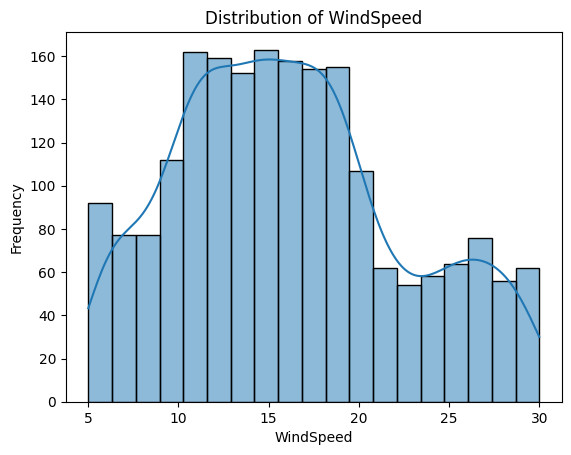

In [9]:
# Visualize the distribution of a feature, for example 'WindSpeed'
sns.histplot(data['Wind_Shear'], kde=True)
plt.title('Distribution of WindSpeed')
plt.xlabel('WindSpeed')
plt.ylabel('Frequency')
plt.show()

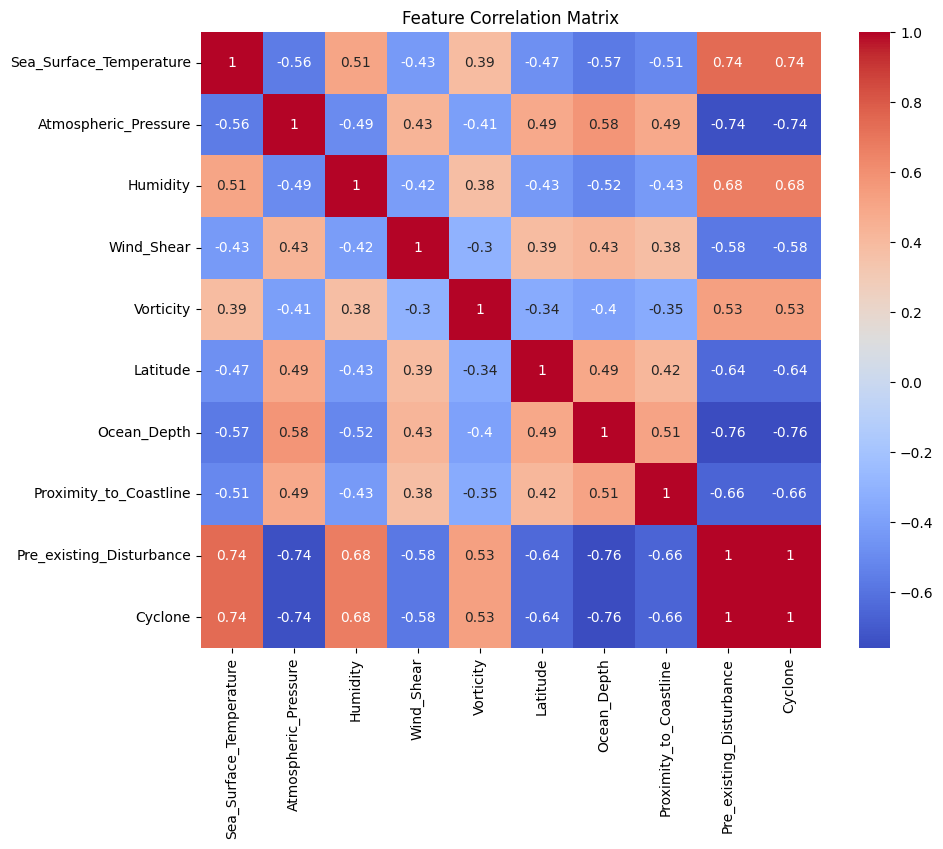

In [10]:
# Visualize the correlation matrix of the dataset
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [12]:
# Split the dataset into features and target variable
features = ['max_wind_speed', 'central_pressure', 'size', 'month']
# The columns in 'features' do not exist in your dataframe.
# Use the actual column names from your data instead:
features = [
    'Sea_Surface_Temperature',
    'Atmospheric_Pressure',
    'Humidity',
    'Wind_Shear',
    'Vorticity',
    'Latitude',
    'Ocean_Depth',
    'Proximity_to_Coastline',
    'Pre_existing_Disturbance'
]
X = data[features]
y = data['Cyclone']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [15]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print()

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

ROC AUC Score: 1.0

Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

ROC AUC Score: 1.0

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       

c:\Users\BKVY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:01:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


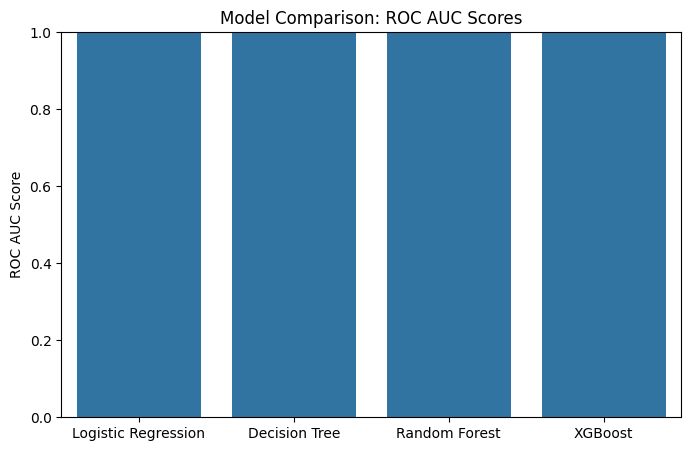

In [16]:
# Compare model ROC AUC scores visually
model_scores = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    score = roc_auc_score(y_test, y_pred)
    model_scores[model_name] = score

plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.ylabel('ROC AUC Score')
plt.title('Model Comparison: ROC AUC Scores')
plt.ylim(0, 1)
plt.show()

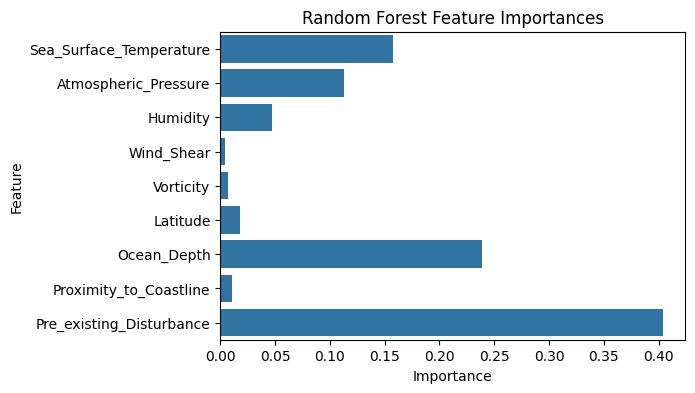

In [17]:
# Display feature importances for the Random Forest model
importances = models['Random Forest'].feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

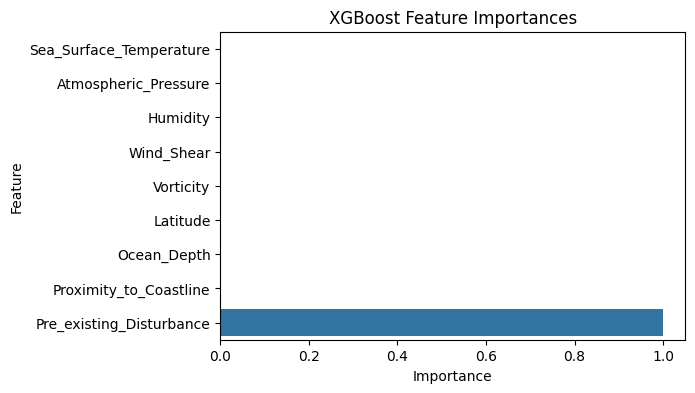

In [18]:
# Display feature importances for the XGBoost model
xgb_importances = models['XGBoost'].feature_importances_
xgb_feature_names = X_train.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=xgb_importances, y=xgb_feature_names)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [20]:
import joblib

# Save the best model (assuming Random Forest has the highest ROC AUC score)
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]

joblib.dump(best_model, f'cyclone_model.pkl')
print(f"{best_model_name} model saved as '{best_model_name.replace(' ', '_').lower()}_model.joblib'")

Logistic Regression model saved as 'logistic_regression_model.joblib'
